## Financial Fraud Exploratory Data Analysis

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
df = pd.read_csv('../data/raw/PS_20174392719_1491204439457_log.csv')

In [3]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
df.shape

(6362620, 11)

As we can see from our initial exploration process, we are dealing with an extremely large dataset. It has a mixture of both discrete, continous and string variables within our dataset. A good news is that this dataset does not contain any null values. This dataset mainly focuses on classifying whether a trasnaction is fraud or not through the isFraud and isFlaggedFraud columns. We will be exploring more of our dataset 

## Univariate Exploratory Analysis

In [8]:
#Our data is way too large and computationally heavy to conduct EDA. To speed up the process I decided to use random sampling on my data.
#Since our goal is to initially explore data in order to identify trends and patterns a smaller sample size could work.

sampled_df = df.sample(n=50000, random_state=42)

In [9]:
sampled_df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3737323,278,CASH_IN,330218.42,C632336343,20866.00,351084.42,C834976624,452419.57,122201.15,0,0
264914,15,PAYMENT,11647.08,C1264712553,30370.00,18722.92,M215391829,0.00,0.00,0,0
85647,10,CASH_IN,152264.21,C1746846248,106589.00,258853.21,C1607284477,201303.01,49038.80,0,0
5899326,403,TRANSFER,1551760.63,C333676753,0.00,0.00,C1564353608,3198359.45,4750120.08,0,0
2544263,206,CASH_IN,78172.30,C813403091,2921331.58,2999503.88,C1091768874,415821.90,337649.60,0,0


In [10]:
sampled_df.shape

(50000, 11)

In [11]:
sampled_df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.000000,50000.000000
mean,243.524580,1.802593e+05,8.405440e+05,8.623184e+05,1.092142e+06,1.217457e+06,0.001400,0.000020
std,142.989564,5.394901e+05,2.905490e+06,2.940672e+06,3.123411e+06,3.349252e+06,0.037391,0.004472
min,1.000000,9.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,155.000000,1.358008e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,239.000000,7.568036e+04,1.384450e+04,0.000000e+00,1.432386e+05,2.210873e+05,0.000000,0.000000
75%,335.000000,2.092434e+05,1.070732e+05,1.471921e+05,9.639589e+05,1.129805e+06,0.000000,0.000000
max,736.000000,3.697390e+07,3.359321e+07,3.374855e+07,1.540135e+08,1.542411e+08,1.000000,1.000000


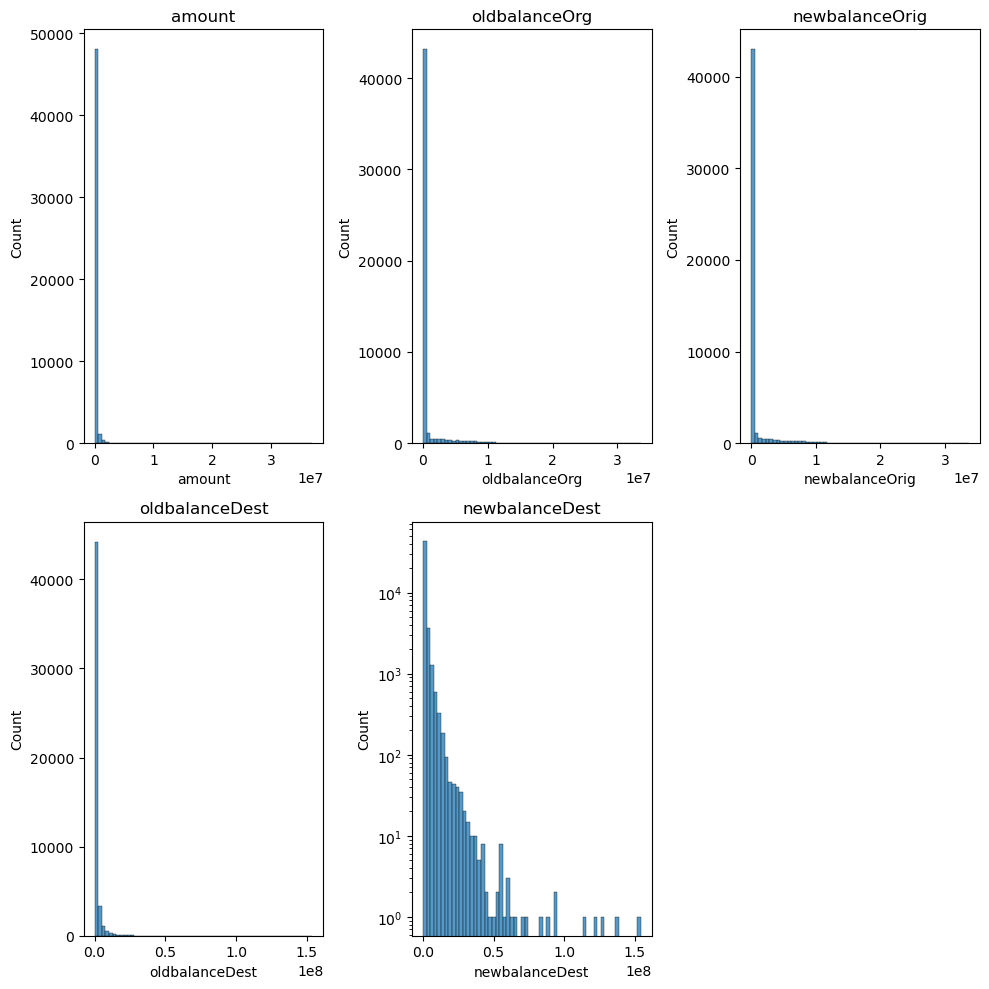

In [12]:
#Instead of plotting histograms for each feature separately we join them together for one big analysis

selected_columns = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]

plt.figure(figsize=(10, 10))
for i, column in enumerate(selected_columns):
    plt.subplot(2, 3, i+1)  # Adjusted subplot grid to 2 rows and 3 columns
    sns.histplot(sampled_df[column], bins=60, kde=False)
    plt.title(column)
plt.tight_layout()
plt.yscale("log")
plt.show()


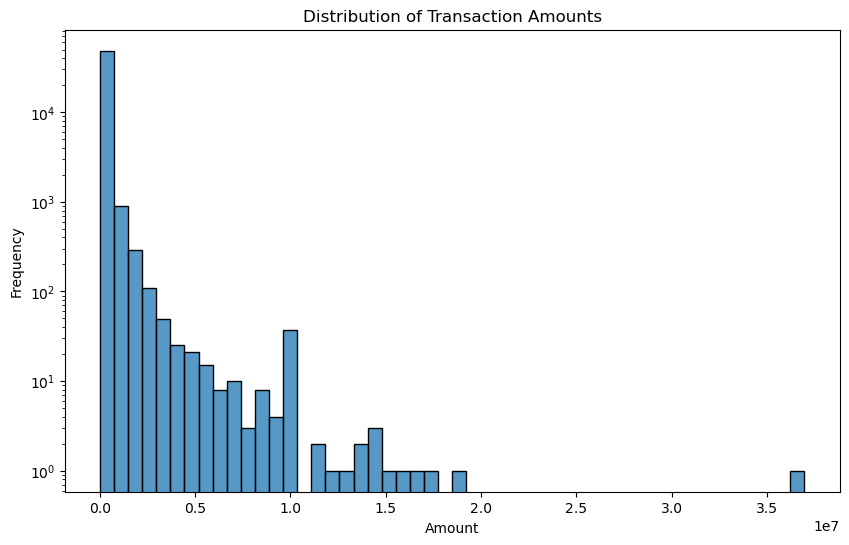

In [13]:
# Let's see the column "Distribution of Transaction Amounts" closer.

plt.figure(figsize=(10, 6))
sns.histplot(sampled_df['amount'], bins=50, kde=False)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.yscale("log")
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='type'>

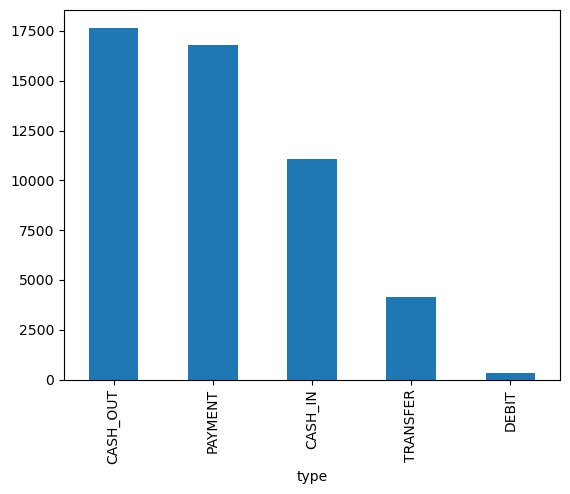

In [14]:
transaction_type_counts = sampled_df["type"].value_counts()
transaction_type_counts.plot.bar()

<Axes: xlabel='isFraud', ylabel='count'>

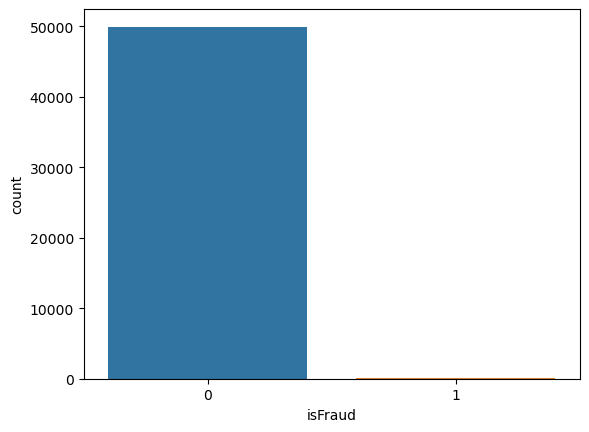

In [15]:
#Lets now analyze and see if the classes on the columns "isFlaggedFraud" and "isFraud" are balanced.

sns.countplot(x="isFraud", data=sampled_df)

In [16]:
sampled_df["isFraud"].value_counts()

isFraud
0    49930
1       70
Name: count, dtype: int64

<Axes: xlabel='isFlaggedFraud', ylabel='count'>

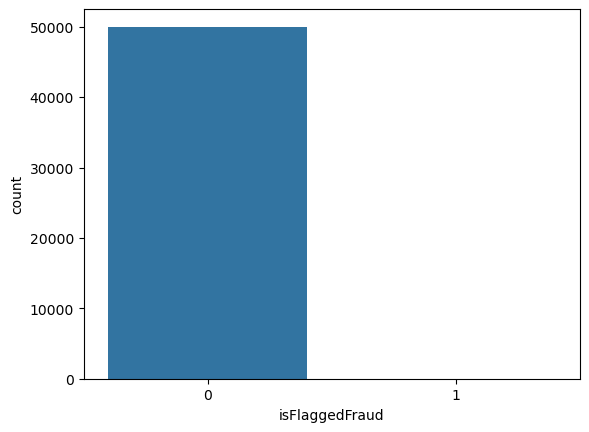

In [17]:
sns.countplot(x="isFlaggedFraud", data=sampled_df)

In [18]:
sampled_df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    49999
1        1
Name: count, dtype: int64

## Bivariate Exploratory Analysis

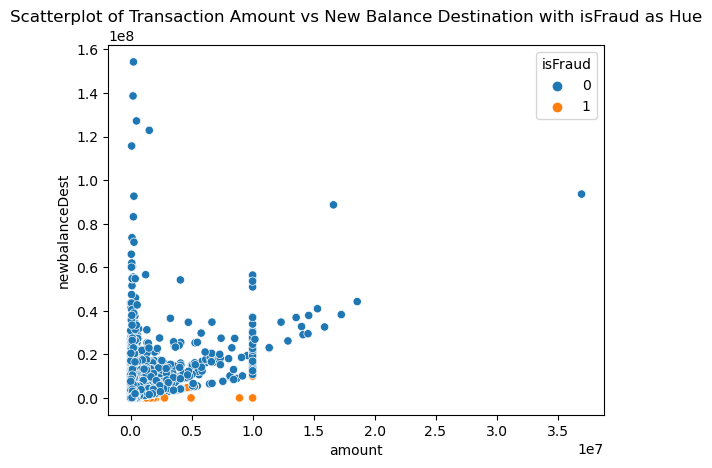

In [19]:
sns.scatterplot(data=sampled_df, x="amount", y="newbalanceDest", hue = "isFraud")
plt.title("Scatterplot of Transaction Amount vs New Balance Destination with isFraud as Hue")
plt.legend(title="isFraud")

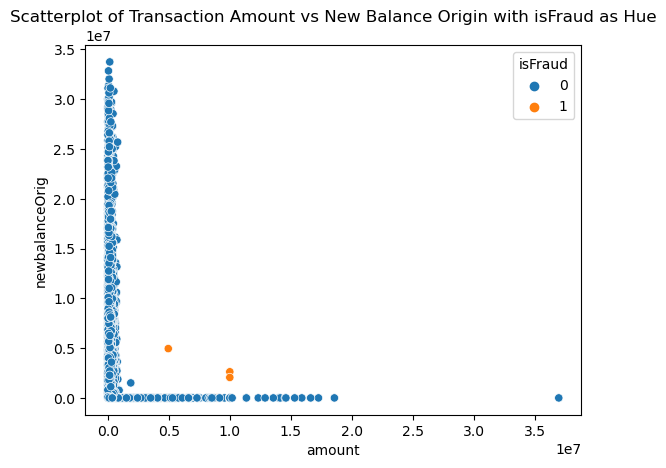

In [20]:
sns.scatterplot(data=sampled_df, x="amount", y="newbalanceOrig", hue = "isFraud")
plt.title("Scatterplot of Transaction Amount vs New Balance Origin with isFraud as Hue")
plt.legend(title="isFraud")

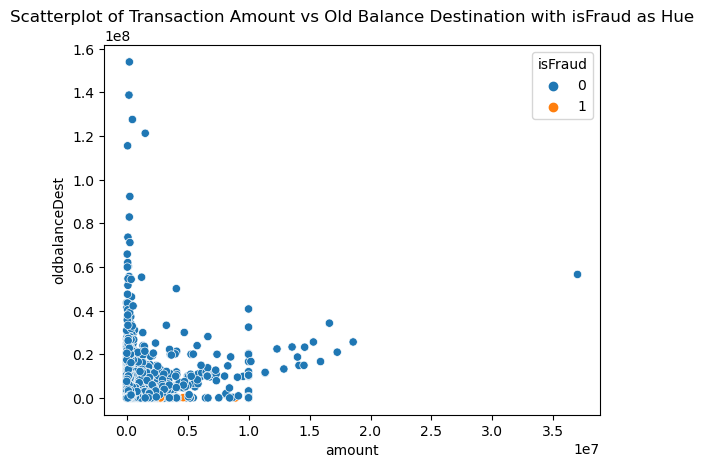

In [21]:
sns.scatterplot(data=sampled_df, x="amount", y="oldbalanceDest", hue = "isFraud")
plt.title("Scatterplot of Transaction Amount vs Old Balance Destination with isFraud as Hue")
plt.legend(title="isFraud")

<Axes: xlabel='type', ylabel='count'>

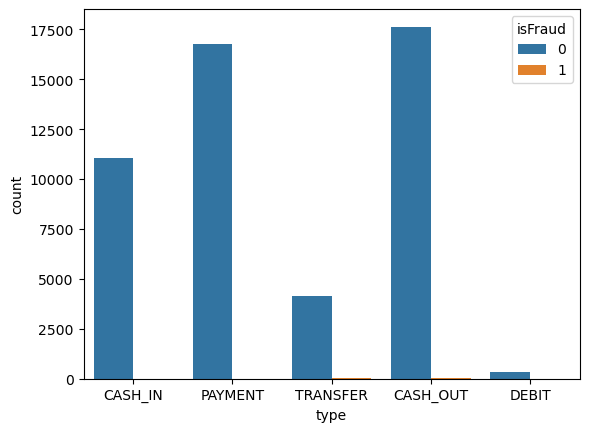

In [22]:
sns.countplot(x="type", data=sampled_df, hue="isFraud")

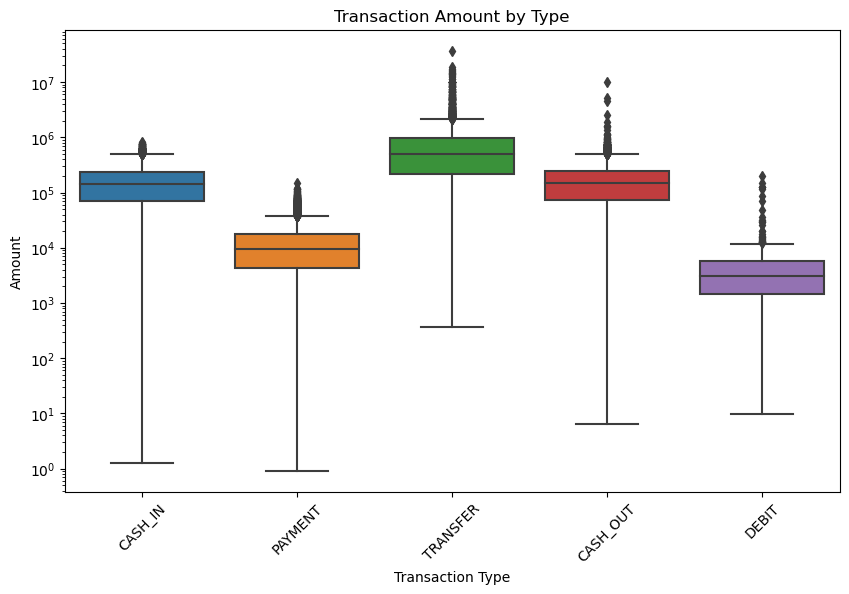

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='amount', data=sampled_df)
plt.title('Transaction Amount by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Amount')
plt.yscale('log')
plt.xticks(rotation=45)  # Rotate labels if necessary
plt.show()

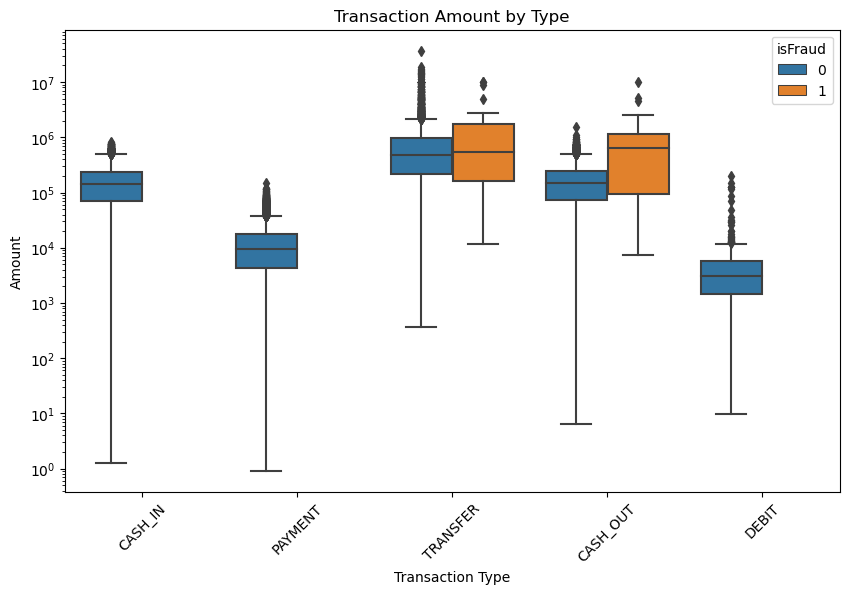

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='amount', data=sampled_df,hue='isFraud')
plt.title('Transaction Amount by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Amount')
plt.yscale('log')
plt.xticks(rotation=45)  # Rotate labels if necessary
plt.show()

In [25]:
cashout_sampled_df = sampled_df[sampled_df['type']=='CASH_OUT']
cashout2_sampled_df = cashout_sampled_df[cashout_sampled_df['isFraud'] == 1] 
cashout2_sampled_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6303116,683,CASH_OUT,93483.23,C1773649560,93483.23,0.0,C2085820540,86882.30,180365.53,1,0
3960303,294,CASH_OUT,806863.30,C747251675,806863.30,0.0,C1519845212,2344186.16,3151049.45,1,0
1030272,51,CASH_OUT,1170282.92,C555990868,1170282.92,0.0,C1318550066,173264.14,1343547.06,1,0
1212611,133,CASH_OUT,1159010.44,C1724151856,1159010.44,0.0,C1229046559,175085.52,1334095.97,1,0
6328876,689,CASH_OUT,953615.38,C1034067842,953615.38,0.0,C64488744,0.00,953615.38,1,0
6021361,467,CASH_OUT,636942.02,C1873382948,636942.02,0.0,C916193312,46336.09,683278.11,1,0
5545406,382,CASH_OUT,1595587.46,C1681145385,1595587.46,0.0,C1060758741,7519338.35,9114925.81,1,0
6296627,674,CASH_OUT,306505.03,C1205102139,306505.03,0.0,C125162058,0.00,306505.03,1,0
5115795,356,CASH_OUT,7360.15,C850424960,7360.15,0.0,C1620165471,556439.41,563799.56,1,0
6272957,626,CASH_OUT,55740.39,C931224089,55740.39,0.0,C1157817503,1659141.34,1714881.73,1,0


In [26]:
cashout2_sampled_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6303116,683,CASH_OUT,93483.23,C1773649560,93483.23,0.0,C2085820540,86882.30,180365.53,1,0
3960303,294,CASH_OUT,806863.30,C747251675,806863.30,0.0,C1519845212,2344186.16,3151049.45,1,0
1030272,51,CASH_OUT,1170282.92,C555990868,1170282.92,0.0,C1318550066,173264.14,1343547.06,1,0
1212611,133,CASH_OUT,1159010.44,C1724151856,1159010.44,0.0,C1229046559,175085.52,1334095.97,1,0
6328876,689,CASH_OUT,953615.38,C1034067842,953615.38,0.0,C64488744,0.00,953615.38,1,0
6021361,467,CASH_OUT,636942.02,C1873382948,636942.02,0.0,C916193312,46336.09,683278.11,1,0
5545406,382,CASH_OUT,1595587.46,C1681145385,1595587.46,0.0,C1060758741,7519338.35,9114925.81,1,0
6296627,674,CASH_OUT,306505.03,C1205102139,306505.03,0.0,C125162058,0.00,306505.03,1,0
5115795,356,CASH_OUT,7360.15,C850424960,7360.15,0.0,C1620165471,556439.41,563799.56,1,0
6272957,626,CASH_OUT,55740.39,C931224089,55740.39,0.0,C1157817503,1659141.34,1714881.73,1,0


In [27]:
transfer_sampled_df = sampled_df[sampled_df['type']=='TRANSFER']
transfer2_sampled_df = transfer_sampled_df[transfer_sampled_df['isFraud'] == 1] 
transfer2_sampled_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
2801129,223,TRANSFER,334890.91,C1711836423,334890.91,0.00,C1676868220,0.0,0.0,1,0
6272260,621,TRANSFER,2060748.45,C1129518026,2060748.45,0.00,C1288050386,0.0,0.0,1,0
2381590,194,TRANSFER,1501297.88,C1043170433,1501297.88,0.00,C768896772,0.0,0.0,1,0
6296127,672,TRANSFER,330756.72,C2036720607,330756.72,0.00,C2048695496,0.0,0.0,1,0
1070138,125,TRANSFER,621569.61,C288917283,621569.61,0.00,C652970534,0.0,0.0,1,0
6307804,684,TRANSFER,537025.01,C1744276151,537025.01,0.00,C38221870,0.0,0.0,1,0
6284987,659,TRANSFER,50577.26,C1316214248,50577.26,0.00,C258297830,0.0,0.0,1,0
6264966,613,TRANSFER,1892137.66,C1387416875,1892137.66,0.00,C1999528314,0.0,0.0,1,0
5987982,413,TRANSFER,115085.31,C2039186549,115085.31,0.00,C544794295,0.0,0.0,1,0


<Axes: xlabel='isFraud', ylabel='isFlaggedFraud'>

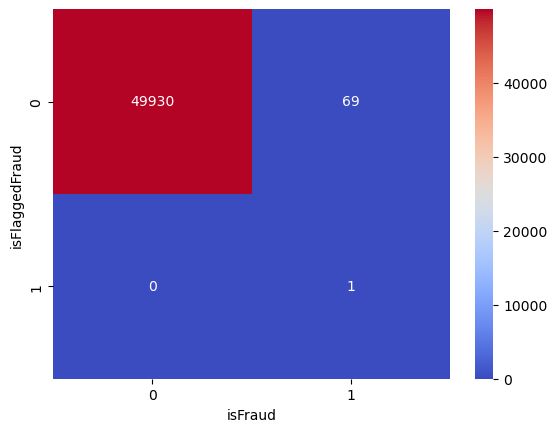

In [28]:
# Let's check is there is a colinearity relationship between "isFraud" and "isFlaggedFraud" if there is we may 
# have to drop "isFlaggedFraud" later to reduce redundancy

Fraud_Heatmap = pd.crosstab(sampled_df['isFlaggedFraud'], sampled_df['isFraud'])
sns.heatmap(Fraud_Heatmap, annot=True, cmap='coolwarm', fmt='g')

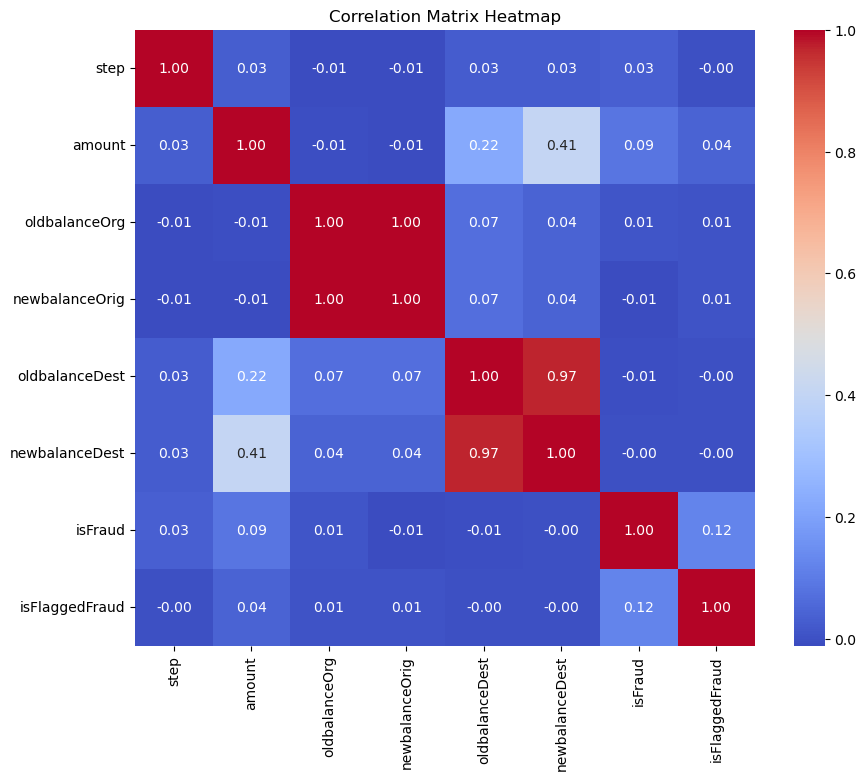

In [29]:
# Calculate correlation matrix
corr_matrix = sampled_df.corr(numeric_only=True)

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

/Users/jacob/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


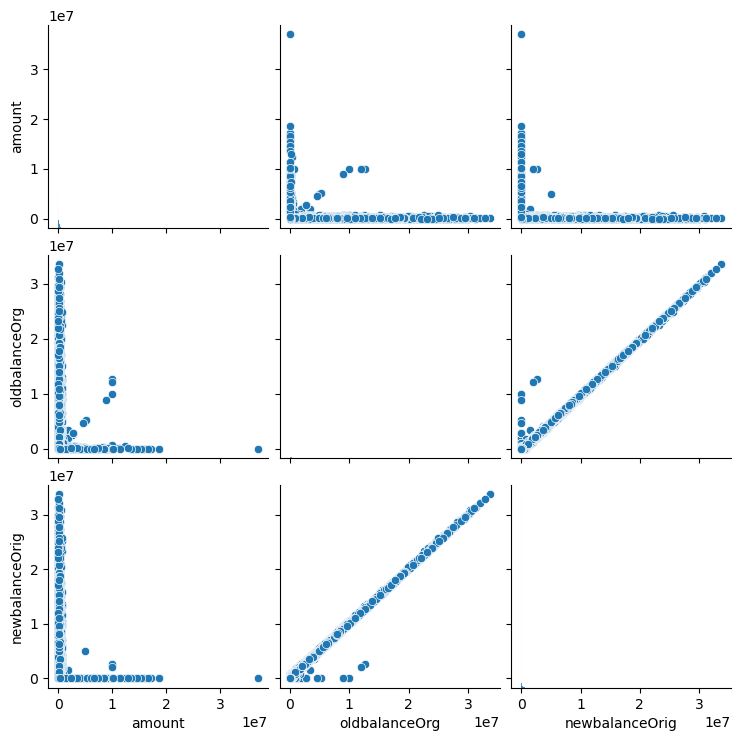

In [30]:
#Select a subset of numerical features if there are many, to keep the plot interpretable
selected_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig']  # Example subset
sns.pairplot(sampled_df[selected_features])
plt.show()

In [31]:
# From our results we can see that isFlaggedFraud and isFraud is great at detecting non-fradulent cases, but it is much difficult
# for it to detect rare cases such as actual fradulent cases. In our case, there has been many fradulent cases, in which isFlaggedFraud
# is not able to identify and catch.